In [1]:
import pandas as pd
pd.set_option('display.max_columns',50)

In [2]:
data = pd.read_excel('excel1.xlsx')

In [3]:
data.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [4]:
data.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [5]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


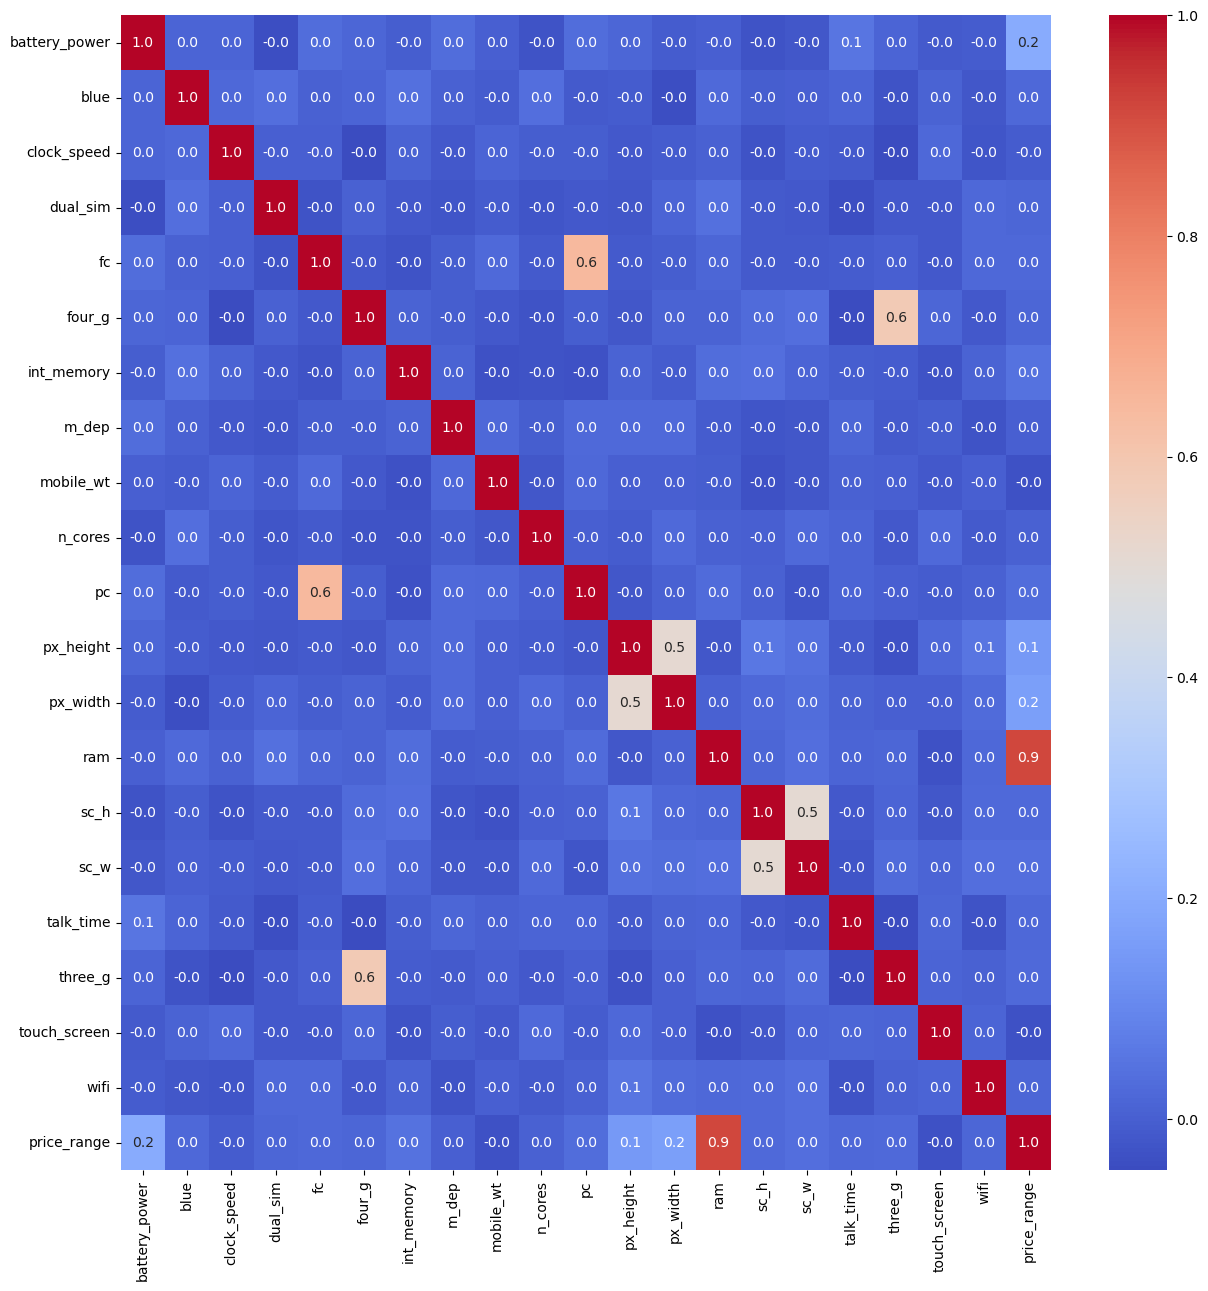

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),cmap='coolwarm',annot=True,fmt='.1f');

All features are less correlated with target variable(price_range) except battery_power, px_height, px_width, ram.

In [7]:
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

## Statistical tests for all columns:

In [8]:
cat_cols = ['blue','dual_sim','four_g','n_cores','three_g','touch_screen','wifi','ram']
num_cols = ['battery_power','clock_speed', 'fc',
       'int_memory', 'm_dep', 'mobile_wt','pc', 'px_height',
       'px_width', 'sc_h', 'sc_w', 'talk_time']
from scipy.stats import chi2_contingency

# Ho: Columns are not significant
# Ha: Columns are significant

for column in cat_cols:
    contingency_table = pd.crosstab(data[column], data['price_range'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-square test for {column}: p-value = {p_value}")

Chi-square test for blue: p-value = 0.6980177809451273
Chi-square test for dual_sim: p-value = 0.7323497176264594
Chi-square test for four_g: p-value = 0.36471408196943356
Chi-square test for n_cores: p-value = 0.488293911066102
Chi-square test for three_g: p-value = 0.7116958581372179
Chi-square test for touch_screen: p-value = 0.27470114180281896
Chi-square test for wifi: p-value = 0.8359905195342198
Chi-square test for ram: p-value = 5.726600585736166e-13


In [9]:
# Ho: price_range has no relation with the column
# Ha: Ho is False

import statsmodels.formula.api as sfa
from statsmodels.stats.anova import anova_lm
model = sfa.ols("price_range~battery_power+clock_speed+fc+int_memory+m_dep+mobile_wt+pc+px_height+px_width+sc_w+sc_h+talk_time",data = data).fit()

anova_lm(model).iloc[:,-1][anova_lm(model).iloc[:,-1]<0.05]

battery_power    2.955029e-20
int_memory       3.369902e-02
px_height        1.516642e-11
px_width         5.175653e-07
Name: PR(>F), dtype: float64

from  statistical as well as direct correlation plot we are left only with battery_power, px_height, px_width, ram as rich features.

In [10]:
data.drop(columns = ['blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
                     'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],inplace=True)

In [11]:
data.columns

Index(['battery_power', 'px_height', 'px_width', 'ram', 'price_range'], dtype='object')

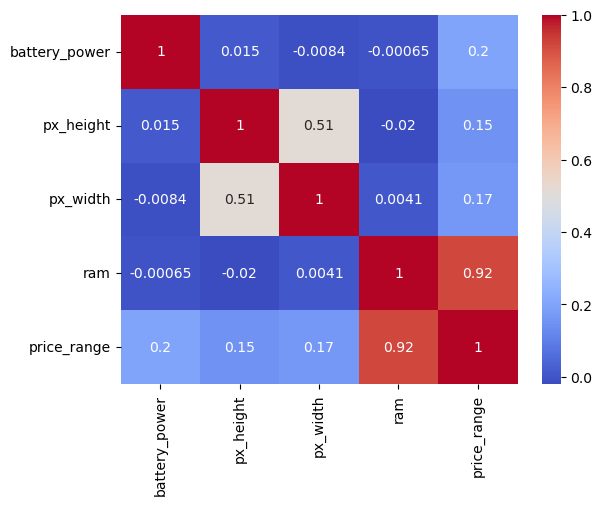

In [12]:
sns.heatmap(data.corr(),annot=True,cmap='coolwarm');

### Univariate Analysis:

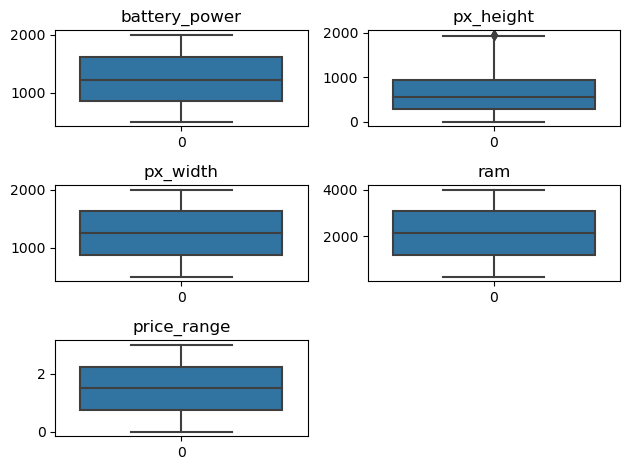

In [13]:
t = 1
for i in data.columns:
    plt.subplot(3,2,t)
    sns.boxplot(data[i])
    t+=1
    plt.title(i)
plt.tight_layout()
plt.show()

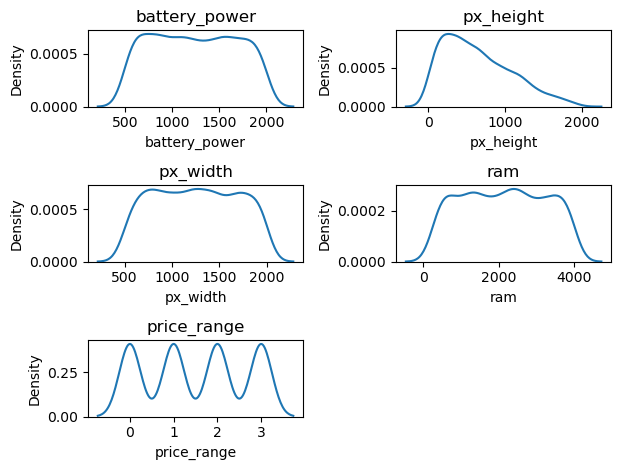

In [14]:
t = 1
for i in data.columns:
    plt.subplot(3,2,t)
    sns.kdeplot(data[i])
    t+=1
    plt.title(i)
plt.tight_layout()
plt.show()

##### Splitting the data into train and test:

In [15]:
x = data.drop(columns='price_range')
y = data.price_range

from sklearn.model_selection import train_test_split

trainx , testx, trainy, testy = train_test_split(x,y,stratify=y,train_size=0.80,random_state=10)

In [16]:
print(trainx.shape,trainy.shape,testx.shape,testy.shape)

(1600, 4) (1600,) (400, 4) (400,)


## Classification 4 Categories Modelling:

In [17]:
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier,GradientBoostingClassifier,StackingClassifier,VotingClassifier
from sklearn.metrics import classification_report,cohen_kappa_score,confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,roc_auc_score,roc_curve

In [18]:
def model_validation(model,trainx,trainy,testx,testy):
    m = model
    m.fit(trainx,trainy)
    ypred = m.predict(testx)
    print('1.Confusion Matrix:\n',confusion_matrix(testy,ypred))
    print('2.Classification report:\n',classification_report(testy,ypred))
    print('3.Cohen Kappa Score:',cohen_kappa_score(testy,ypred))
    print('4.Accuracy Score:',accuracy_score(testy,ypred))

In [19]:
model_validation(RandomForestClassifier(),trainx,trainy,
                testx,testy)

1.Confusion Matrix:
 [[97  3  0  0]
 [ 2 92  6  0]
 [ 0  9 84  7]
 [ 0  0 11 89]]
2.Classification report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       100
           1       0.88      0.92      0.90       100
           2       0.83      0.84      0.84       100
           3       0.93      0.89      0.91       100

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400

3.Cohen Kappa Score: 0.8733333333333333
4.Accuracy Score: 0.905


In [20]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
model_validation(lg,trainx,trainy,testx,testy)


1.Confusion Matrix:
 [[99  1  0  0]
 [ 0 95  5  0]
 [ 0  1 92  7]
 [ 0  0  3 97]]
2.Classification report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       100
           1       0.98      0.95      0.96       100
           2       0.92      0.92      0.92       100
           3       0.93      0.97      0.95       100

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400

3.Cohen Kappa Score: 0.9433333333333334
4.Accuracy Score: 0.9575


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
model_validation(AdaBoostClassifier(),trainx,trainy,testx,testy)

1.Confusion Matrix:
 [[77 23  0  0]
 [ 8 75 17  0]
 [ 0  6 86  8]
 [ 0  0 28 72]]
2.Classification report:
               precision    recall  f1-score   support

           0       0.91      0.77      0.83       100
           1       0.72      0.75      0.74       100
           2       0.66      0.86      0.74       100
           3       0.90      0.72      0.80       100

    accuracy                           0.78       400
   macro avg       0.80      0.77      0.78       400
weighted avg       0.80      0.78      0.78       400

3.Cohen Kappa Score: 0.7
4.Accuracy Score: 0.775


In [22]:
model_validation(GradientBoostingClassifier(),trainx,trainy,testx,testy)

1.Confusion Matrix:
 [[95  5  0  0]
 [ 3 90  7  0]
 [ 0  6 87  7]
 [ 0  0 13 87]]
2.Classification report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       100
           1       0.89      0.90      0.90       100
           2       0.81      0.87      0.84       100
           3       0.93      0.87      0.90       100

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400

3.Cohen Kappa Score: 0.8633333333333333
4.Accuracy Score: 0.8975


In [23]:
perf_table = pd.DataFrame(columns=['Model','Data','Accuracy','Cohen Kappa Score',])
def model_perf(name,data,model,trainx,trainy,testx,testy):
    m = model
    m.fit(trainx,trainy)
    ypred = m.predict(testx)
    a = cohen_kappa_score(testy,ypred)
    b = accuracy_score(testy,ypred)
    
    global perf_table
    perf_table = perf_table.append({'Model':name,
                                    'Data':data,
                                    'Accuracy':b,
                                    
                                    
                                   
                                    'Cohen Kappa Score':a},
                                   ignore_index = True)

In [24]:
model_perf(name='Random Forest',data='Train',model=RandomForestClassifier(n_estimators=200,max_depth=5),
          trainx=trainx,trainy=trainy,testx=trainx,testy=trainy)

C:\Users\USER\AppData\Local\Temp\ipykernel_13352\1948652975.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  perf_table = perf_table.append({'Model':name,


In [25]:
model_perf(name='Random Forest',data='Test',model=RandomForestClassifier(n_estimators=200,max_depth=5),
          trainx=trainx,trainy=trainy,testx=testx,testy=testy)

C:\Users\USER\AppData\Local\Temp\ipykernel_13352\1948652975.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  perf_table = perf_table.append({'Model':name,


In [26]:
model_perf(name='Logistic Regression',data='Train',model=LogisticRegression(),
          trainx=trainx,trainy=trainy,testx=trainx,testy=trainy)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\USER\AppData\Local\Temp\ipykernel_13352\1948652975.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  perf_table = perf_table.append({'Model':name,


In [27]:
model_perf(name='Logistic Regression',data='Test',model=LogisticRegression(),
          trainx=trainx,trainy=trainy,testx=testx,testy=testy)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\USER\AppData\Local\Temp\ipykernel_13352\1948652975.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  perf_table = perf_table.append({'Model':name,


In [28]:
model_perf(name='Gradient Boosting',data='Train',model=GradientBoostingClassifier(),
          trainx=trainx,trainy=trainy,testx=trainx,testy=trainy)

C:\Users\USER\AppData\Local\Temp\ipykernel_13352\1948652975.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  perf_table = perf_table.append({'Model':name,


In [29]:
model_perf(name='Gradient Boosting',data='Test',model=GradientBoostingClassifier(),
          trainx=trainx,trainy=trainy,testx=testx,testy=testy)

C:\Users\USER\AppData\Local\Temp\ipykernel_13352\1948652975.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  perf_table = perf_table.append({'Model':name,


In [30]:
from xgboost import XGBClassifier
model_perf(name='Extreme Gradient Boosting',data='Train',model=XGBClassifier(),
          trainx=trainx,trainy=trainy,testx=trainx,testy=trainy)

C:\Users\USER\AppData\Local\Temp\ipykernel_13352\1948652975.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  perf_table = perf_table.append({'Model':name,


In [31]:

model_perf(name='Extreme Gradient Boosting',data='Test',model=XGBClassifier(),
          trainx=trainx,trainy=trainy,testx=testx,testy=testy)

C:\Users\USER\AppData\Local\Temp\ipykernel_13352\1948652975.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  perf_table = perf_table.append({'Model':name,


In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
model_perf(name='Decision Tree',data='Train',model=DecisionTreeClassifier(max_depth=5),
          trainx=trainx,trainy=trainy,testx=trainx,testy=trainy)

C:\Users\USER\AppData\Local\Temp\ipykernel_13352\1948652975.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  perf_table = perf_table.append({'Model':name,


In [34]:
model_perf(name='Decision Tree',data='Test',model=DecisionTreeClassifier(max_depth=5),
          trainx=trainx,trainy=trainy,testx=testx,testy=testy)

C:\Users\USER\AppData\Local\Temp\ipykernel_13352\1948652975.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  perf_table = perf_table.append({'Model':name,


In [35]:
perf_table

,Model,Data,Accuracy,Cohen Kappa Score
0,Random Forest,Train,0.919375,0.892500
1,Random Forest,Test,0.862500,0.816667
2,Logistic Regression,Train,0.960625,0.947500
3,Logistic Regression,Test,0.957500,0.943333
4,Gradient Boosting,Train,0.998750,0.998333
5,Gradient Boosting,Test,0.897500,0.863333
6,Extreme Gradient Boosting,Train,1.000000,1.000000
7,Extreme Gradient Boosting,Test,0.920000,0.893333
8,Decision Tree,Train,0.875625,0.834167
9,Decision Tree,Test,0.802500,0.736667


In [36]:
lg = LogisticRegression()
lg.fit(trainx,trainy)
pred = lg.predict(testx)
print(accuracy_score(testy,pred))
print(classification_report(testy,pred))

0.9575
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       100
           1       0.98      0.95      0.96       100
           2       0.92      0.92      0.92       100
           3       0.93      0.97      0.95       100

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Clustering:

In [37]:
del data['price_range']

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data_sc = sc.fit_transform(data)
data_sc = pd.DataFrame(data_sc,columns = data.columns)
data_sc.head()

,battery_power,px_height,px_width,ram
0,-0.902597,-1.408949,-1.146784,0.391703
1,-0.495139,0.585778,1.704465,0.467317
2,-1.537686,1.392684,1.074968,0.441498
3,-1.419319,1.286750,1.236971,0.594569
4,1.325906,1.268718,-0.091452,-0.657666


In [41]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca.fit(data_sc)
np.cumsum(pca.explained_variance_ratio_)

array([0.37774115, 0.62811997, 0.87794455, 1.        ])

In [42]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
data_pca = pca.fit_transform(data_sc)
data_pca = pd.DataFrame(data_pca,columns=data.columns)


In [43]:
data_pca.head()

,battery_power,px_height,px_width,ram
0,-1.823714,-0.895689,0.345630,0.143918
1,1.603561,-0.752223,-0.024262,0.757659
2,1.720666,-1.453156,0.705900,-0.289614
3,1.757826,-1.480233,0.512256,-0.101740
4,0.859498,1.443688,-0.426671,-0.896405


In [44]:
import numpy as np
np.cumsum(pca.explained_variance_ratio_)

array([0.37774115, 0.62811997, 0.87794455, 1.        ])

In [45]:
pca = PCA(n_components=3)
data_pca = pca.fit_transform(data_sc)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3'])
data_pca.head()

,PC1,PC2,PC3
0,-1.823714,-0.895689,0.345630
1,1.603561,-0.752223,-0.024262
2,1.720666,-1.453156,0.705900
3,1.757826,-1.480233,0.512256
4,0.859498,1.443688,-0.426671


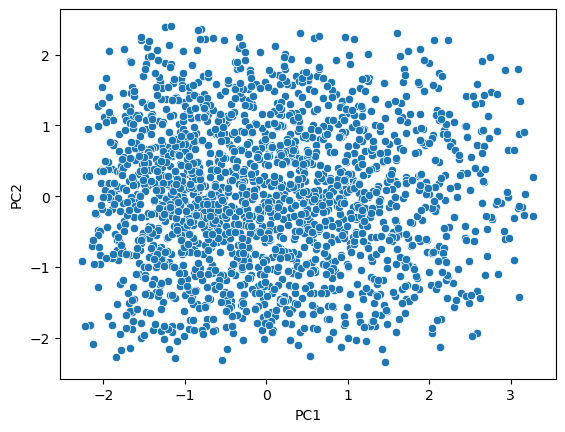

In [46]:
sns.scatterplot(x = data_pca['PC1'],y = data_pca['PC2']);

In [47]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
n_clus = [2,3,4,5,6,7,8,9]
WCSS = []
for i in n_clus:
    model = KMeans(n_clusters=i)
    model.fit_predict(data_pca)
    WCSS.append(model.inertia_)

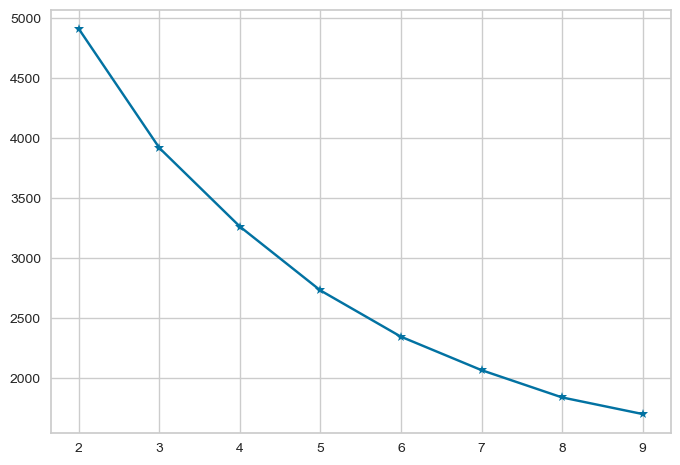

In [50]:
import matplotlib.pyplot as plt
plt.plot(n_clus,WCSS,marker='*')

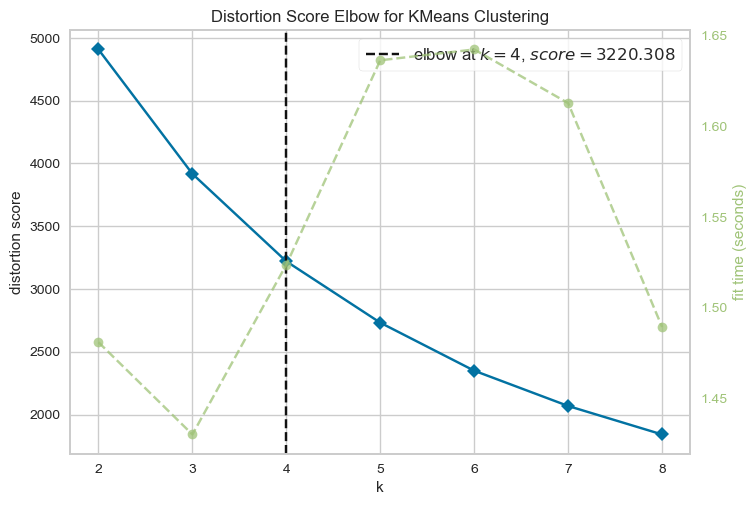

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [49]:
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer
k_elbow = KElbowVisualizer(KMeans(),k=8)
k_elbow.fit(data_pca)
k_elbow.show()

In [51]:
from sklearn.metrics import silhouette_score
silo_score = []
n_clus = [2,3,4,5,6,7,8,9,11,13,14,12]
for i in n_clus:
    model = KMeans(n_clusters=i)
    model.fit(data_pca)
    pred = model.predict(data_pca)
    silo_score.append(silhouette_score(data_pca,pred))

In [52]:
pd.DataFrame([n_clus,silo_score])

,0,1,2,3,4,5,6,7,8,9,10,11
0,2.00000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.00000,11.000000,13.000000,14.000000,12.000000
1,0.27516,0.253214,0.261147,0.264984,0.277265,0.274644,0.287031,0.27881,0.265482,0.264372,0.260816,0.272278


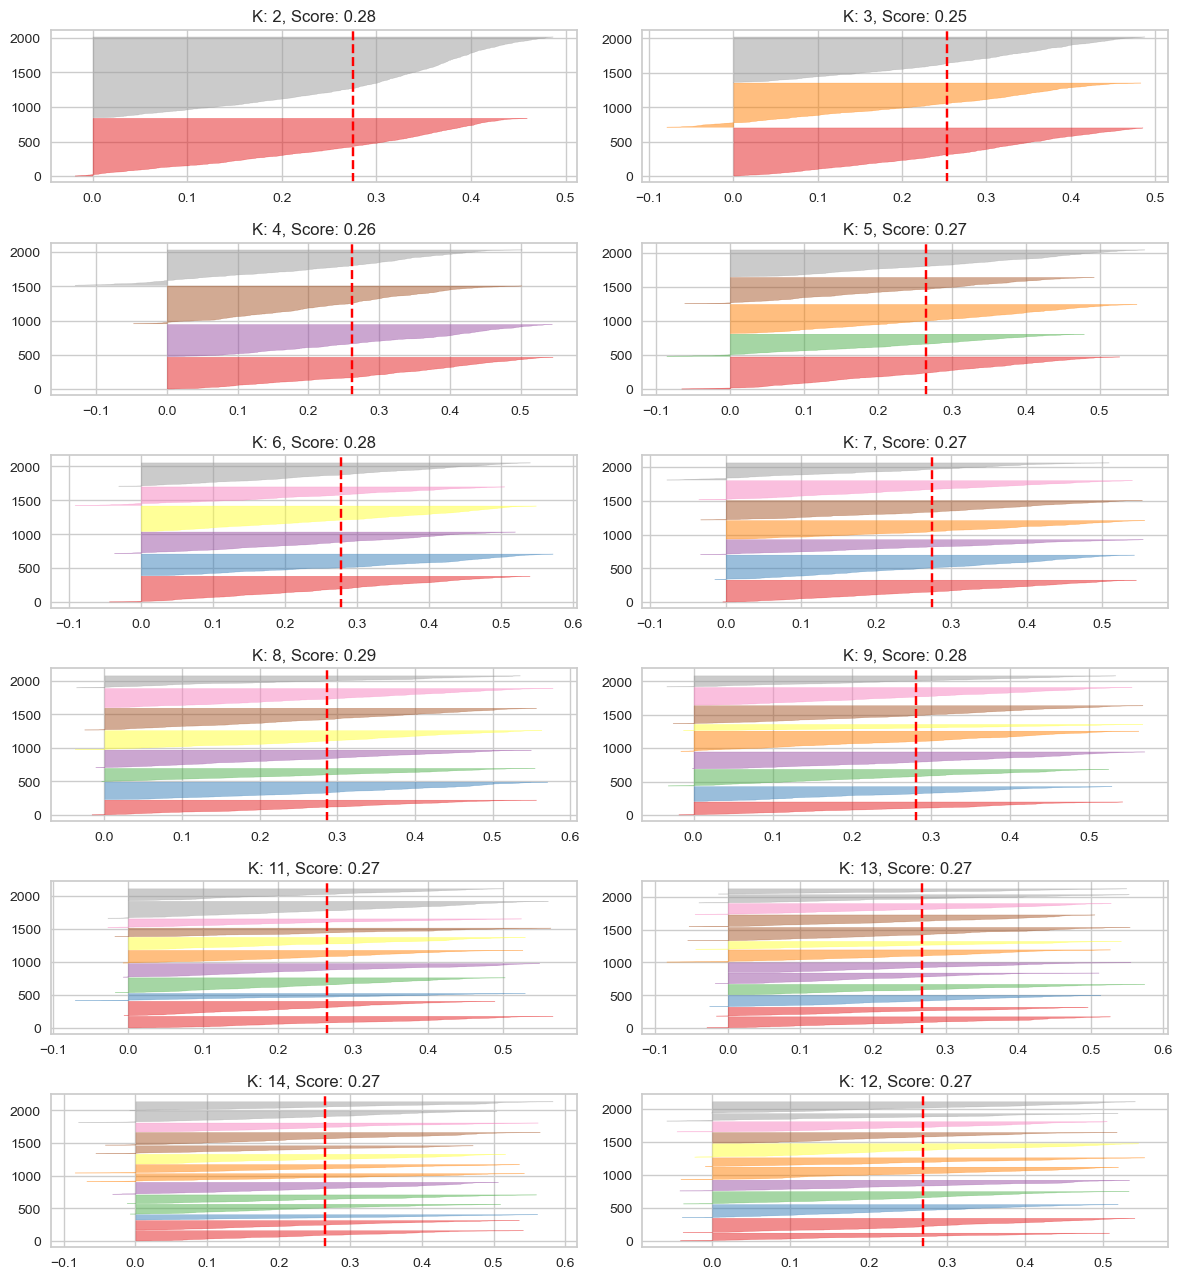

In [53]:
plt.figure(figsize=(12,17))


t = 1
for i in n_clus:
    plt.subplot(8,2,t)
    model = KMeans(n_clusters=i)
    sil_viz = SilhouetteVisualizer(model)
    sil_viz.fit(data_pca)
    plt.title('K: %d, Score: %.2f'%(i,sil_viz.silhouette_score_))
    t+=1
plt.tight_layout()
plt.show()

In [59]:
final_model = KMeans(n_clusters=4)
final_model.fit(data_pca)
data['K_Means_pred'] = final_model.predict(data_pca)

In [60]:
centroids= final_model.cluster_centers_

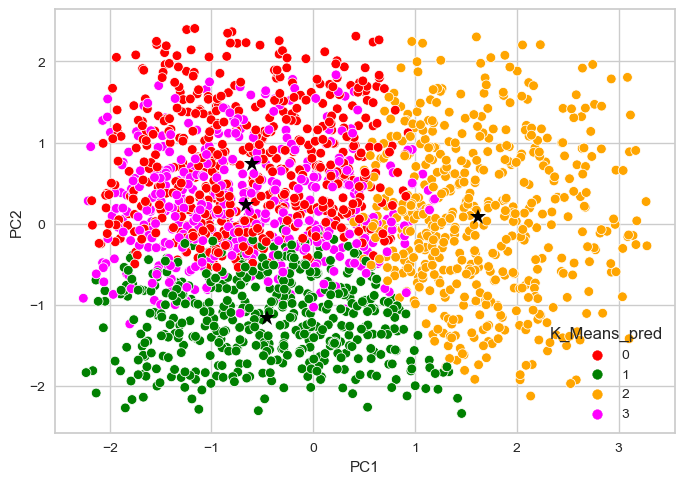

In [62]:
# Visualise these clusters 
sns.scatterplot(x = data_pca['PC1'],y=data_pca['PC2'],\
                hue=data['K_Means_pred'],palette=['red','green','orange','magenta'])
for i in range(4):
    plt.plot(centroids[i][0],centroids[i][1],color='black',marker='*',ms=12)
plt.show()

### Agglomerative Clustering:

In [65]:
from sklearn.cluster import AgglomerativeClustering
n_clus = [2,3,4,5,6,7]
silo_score = []
for i in n_clus:
    model = AgglomerativeClustering(n_clusters=i)
    pred_agg = model.fit_predict(data_pca)
    silo_score.append(silhouette_score(data_pca,pred_agg))

In [66]:
silo_score

[0.26953848463736463,
 0.22675914548679463,
 0.21558864029028876,
 0.21217714586735906,
 0.2027823625975716,
 0.21704360147370158]

In [67]:
data_pca.shape

(2000, 3)

In [78]:
from scipy.cluster.hierarchy import linkage,cophenet,dendrogram


link = linkage(data_pca,method='ward')
from sklearn.metrics.pairwise import euclidean_distances

dist_matx = euclidean_distances(data_pca)
actual_dist = dist_matx[np.triu_indices(2000,k=1)]
ccc , cophenetic_dist = cophenet(link,actual_dist)
ccc

0.5587932834682019

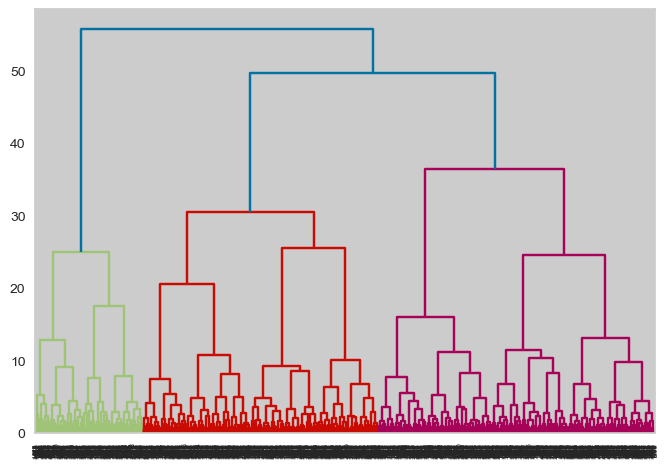

In [79]:
dendrogram(link)
plt.show()

In [81]:
for i in [2,3,4,5,6,7,8,9,10,11]:
    model = AgglomerativeClustering(n_clusters=i,linkage='ward')
    pred_agg = model.fit_predict(data_pca)
    print('k:',i,'Silhouette Score',silhouette_score(data_pca,pred_agg))

k: 2 Silhouette Score 0.26953848463736463
k: 3 Silhouette Score 0.22675914548679463
k: 4 Silhouette Score 0.21558864029028876
k: 5 Silhouette Score 0.21217714586735906
k: 6 Silhouette Score 0.2027823625975716
k: 7 Silhouette Score 0.21704360147370158
k: 8 Silhouette Score 0.22186454435270356
k: 9 Silhouette Score 0.22602287850544964
k: 10 Silhouette Score 0.22479606681105094
k: 11 Silhouette Score 0.2171357500035041


In [83]:
model = AgglomerativeClustering(n_clusters=2,linkage='ward')
pred_agg = model.fit_predict(data_pca)
silhouette_score(data_pca,pred_agg)

0.26953848463736463

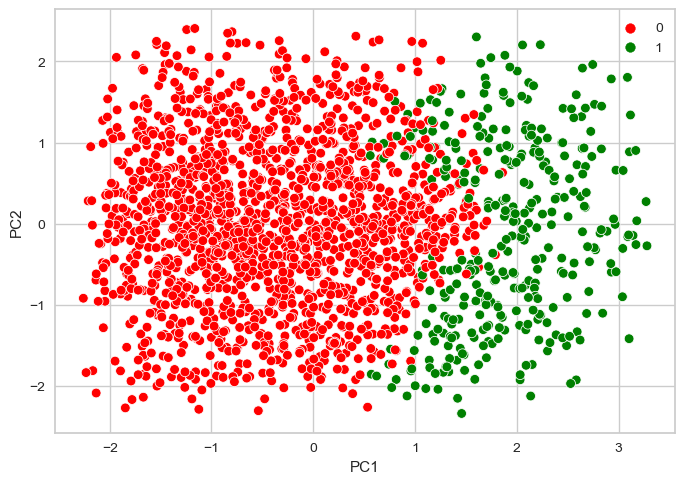

In [85]:
# Visualise these clusters 
sns.scatterplot(x = data_pca['PC1'],y=data_pca['PC2'],\
                hue=pred_agg,palette=['red','green','orange']);
